In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import gridspec
sns.set_style("white")
%matplotlib inline

In [2]:
tableau_colors = [(0.12156, 0.46666, 0.70588), (1.00000, 0.49803, 0.05490), (0.17254, 0.62745, 0.17254), (0.83921, 0.15294, 0.15686), (0.58039, 0.40392, 0.74117), (0.54901, 0.33725, 0.29411),  (0.89019, 0.46666, 0.76078), (0.49803, 0.49803, 0.49803), (0.73725, 0.74117, 0.13333), (0.09019, 0.74509, 0.81176),  (0.00000, 0.00000, 0.00000), (0.68235, 0.78039, 0.90980), (1.00000, 0.73333, 0.47058), (0.59607, 0.87450, 0.54117), (1.00000, 0.59607, 0.58823), (0.77254, 0.69019, 0.83529), (0.76862, 0.61176, 0.58039), (0.96862, 0.71372, 0.82352),  (0.78039, 0.78039, 0.78039), (0.85882, 0.85882, 0.55294)]

In [3]:
title=True

# Profiling output

In [4]:
data = [["FAB39043","1k reads",1000, 88.32, 6.09],
        ["FAB39043","10k reads",10000, 89.94, 4.15],
        ["FAB39043","100k reads",100000, 91.82, 3.35],
        ["FAB39043","ALL reads",436976, 92.08, 3.12],
        ["FAB39075","1k reads",1000, 83.46, 8.49],
        ["FAB39075","10k reads",10000, 89.57, 6.61],
        ["FAB39075","100k reads",100000, 91.01, 4.01],
        ["FAB39075","ALL reads", 466329,92.16, 3.65]
       ]
profile_nreads = pd.DataFrame(data=data, columns=["dataset", "reads", "n_reads", "KSW", "BWT"])

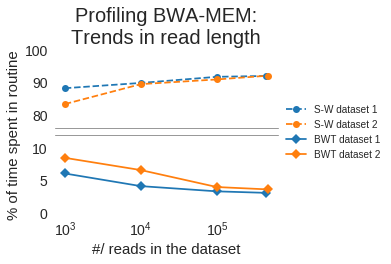

In [5]:
fig = plt.subplots(figsize=(4,3), sharex='col')
grid = gridspec.GridSpec(2,1, hspace=0.5)
ax0 = plt.subplot(grid[0]) 
ax1 = plt.subplot(grid[1])

ax1.set_xlabel("#/ reads in the dataset", fontsize=15)
ax1.set_ylabel("% of time spent in routine", fontsize=15)
ax1.yaxis.set_label_coords(-0.15, 1.2)

ax0.set_xscale("log")
ax1.set_xscale("log")

ax0.set_ylim(80, 100)
ax1.set_ylim(0, 10)

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax0.axhline(y=76, clip_on=False, linewidth=1, c="#999999")
ax0.axhline(y=74, clip_on=False, linewidth=1, c="#999999")


ksw_linestyle = "dashed"
bwt_linestyle = "solid"
ksw_marker = "o"
bwt_marker = "D"

dataset = "FAB39043"
df = profile_nreads[profile_nreads["dataset"]==dataset]
ax0.plot(df["n_reads"],df["KSW"], c=tableau_colors[0], \
         linestyle=ksw_linestyle, marker=ksw_marker, \
         label="S-W dataset 1")
ax1.plot(df["n_reads"],df["BWT"], c=tableau_colors[0], \
         linestyle=bwt_linestyle, marker=bwt_marker,\
         label="BWT dataset 1")


dataset = "FAB39075"
df = profile_nreads[profile_nreads["dataset"]==dataset]
ax0.plot(df["n_reads"],df["KSW"], c=tableau_colors[1], \
         linestyle=ksw_linestyle, marker=ksw_marker, \
         label="S-W dataset 2")
ax1.plot(df["n_reads"],df["BWT"], c=tableau_colors[1], \
         linestyle=bwt_linestyle, marker=bwt_marker,\
         label="BWT dataset 2")


ax0.set_xticklabels([])
h1, l1 = ax0.get_legend_handles_labels()
h2, l2 = ax1.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="right", bbox_to_anchor=(0., 0.5, 1.5, 1.48))

if title:
    ax0.set_title("Profiling BWA-MEM:\nTrends in read length", fontsize=20)
ax0.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("../plots/profile-nreads.png", dpi=1000, bbox_inches="tight")

In [6]:
data = [["FAB39043","100 bps", 100,34.62, 51.08],
        ["FAB39043","1000 bps", 1000,57.8, 34.03],
        ["FAB39043","10000 bps", 10000,86.67, 11.87],
#         ["FAB39043","ALL lengths", 1000000,92.08, 3.12]
       ]
profile_readlen = pd.DataFrame(data=data, columns=["dataset", "lengths","read len", "KSW", "BWT"])

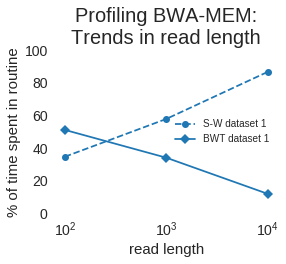

In [7]:
fig = plt.subplots(figsize=(4,3), sharex='col')
grid = gridspec.GridSpec(1,1, hspace=0.5)
ax0 = plt.subplot(grid[0]) 

ax0.set_xlabel("read length", fontsize=15)
ax0.set_ylabel("% of time spent in routine", fontsize=15)
ax0.yaxis.set_label_coords(-0.15, 0.5)

ax0.set_xscale("log")
ax0.set_ylim(0, 100)

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

ksw_linestyle = "dashed"
bwt_linestyle = "solid"
ksw_marker = "o"
bwt_marker = "D"

dataset = "FAB39043"
df = profile_readlen[profile_readlen["dataset"]==dataset]
ax0.plot(df["read len"],df["KSW"], c=tableau_colors[0], \
         linestyle=ksw_linestyle, marker=ksw_marker, \
         label="S-W dataset 1")
ax0.plot(df["read len"],df["BWT"], c=tableau_colors[0], \
         linestyle=bwt_linestyle, marker=bwt_marker,\
         label="BWT dataset 1")

ax0.legend(loc="right")

if title:
    ax0.set_title("Profiling BWA-MEM:\nTrends in read length", fontsize=20)
ax0.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("../plots/profile-readlen.png", dpi=600, bbox_inches="tight")

# FASTQ QC

Ideas:

* Read length distribution
* Read quality (difficult to interpret)

In [8]:
hist_FAB39043 = pd.read_csv("../qc/readlen_hist_FAB39043.txt",delimiter=" ", header=None)
hist_FAB39075 = pd.read_csv("../qc/readlen_hist_FAB39075.txt",delimiter=" ", header=None)

In [9]:
hist_FAB39043 = hist_FAB39043.set_index(hist_FAB39043[0])
hist_FAB39043 = hist_FAB39043.sort_index()

In [10]:
bins = np.zeros(1492)
for start in xrange(0,149200, 100):
    bins[start/100] = np.sum(hist_FAB39043.loc[start:start+100,1])
hist_FAB39043_100 = pd.DataFrame([xrange(0,149200,100),bins]).T
hist_FAB39043_100 = hist_FAB39043_100[hist_FAB39043_100.loc[:,1]>0]

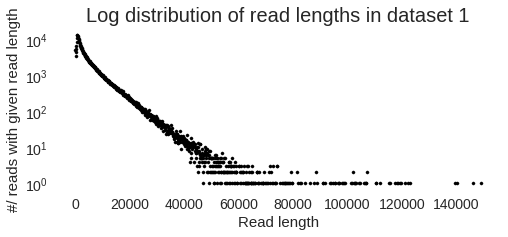

In [11]:
fig = plt.subplots(figsize=(8,3), sharex='col')
grid = gridspec.GridSpec(1,1, hspace=0.5)
ax0 = plt.subplot(grid[0]) 

# ax0.yaxis.set_label_coords(-0.15, 0.5)

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax0.scatter(hist_FAB39043_100[0][:], hist_FAB39043_100[1][:], color="black", s=10)
ax0.set_xlabel("Read length", fontsize=15)
ax0.set_ylabel("#/ reads with given read length", fontsize=15)
ax0.set_yscale("log", basex=10)
ax0.tick_params(axis='both', which='major', labelsize=14)
if title:
    ax0.set_title("Log distribution of read lengths in dataset 1", fontsize=20)
plt.savefig("../plots/readlen.png", dpi=600, bbox_inches="tight")

# CPU power & time analysis

In [12]:
data = [["FAB39043","1k reads",1000, 0.01, 149],
        ["FAB39043","10k reads",10000, 0.03, 1225],
        ["FAB39043","100k reads",100000, 0.41, 12978],
#         ["FAB39043","ALL reads",436976, 0, 0],
        ["FAB39075","1k reads",1000, 0.005, 124],
        ["FAB39075","10k reads",10000, 0.03, 1137],
        ["FAB39075","100k reads",100000, 0.52, 14832],
#         ["FAB39075","ALL reads", 466329, 0, 0]
       ]
cpu_nreads = pd.DataFrame(data=data, columns=["dataset", "reads", "n_reads", "KWh", "wall time"])

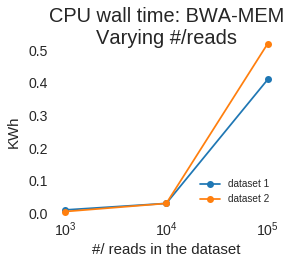

In [13]:
fig = plt.subplots(figsize=(4,3), sharex='col')
grid = gridspec.GridSpec(1,1, hspace=0.5)
ax0 = plt.subplot(grid[0]) 

ax0.set_xlabel("#/ reads in the dataset", fontsize=15)
ax0.set_ylabel("KWh", fontsize=15)
ax0.yaxis.set_label_coords(-0.15, 0.5)

ax0.set_xscale("log")
ax0.set_ylim(0, .5)

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

linestyle = "solid"
marker = "o"

dataset = "FAB39043"
df = cpu_nreads[cpu_nreads["dataset"]==dataset]
ax0.plot(df["n_reads"],df["KWh"], c=tableau_colors[0], \
         linestyle=linestyle, marker=marker, \
         label="dataset 1", clip_on=False)
dataset = "FAB39075"
df = cpu_nreads[cpu_nreads["dataset"]==dataset]
ax0.plot(df["n_reads"],df["KWh"], c=tableau_colors[1], \
         linestyle=linestyle, marker=marker,\
         label="dataset 2", clip_on=False)

ax0.legend(loc="lower right")

if title:
    ax0.set_title("CPU wall time: BWA-MEM\nVarying #/reads", fontsize=20)
ax0.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("../plots/cpu-energy-nreads.png", dpi=600, bbox_inches="tight")

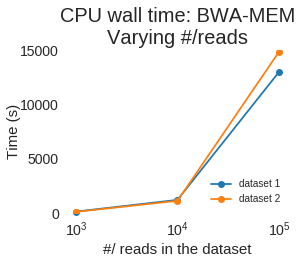

In [14]:
fig = plt.subplots(figsize=(4,3), sharex='col')
grid = gridspec.GridSpec(1,1, hspace=0.5)
ax0 = plt.subplot(grid[0]) 

ax0.set_xlabel("#/ reads in the dataset", fontsize=15)
ax0.set_ylabel("Time (s)", fontsize=15)
ax0.yaxis.set_label_coords(-0.2, 0.5)

ax0.set_xscale("log")
ax0.set_ylim(0, 15000)

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

linestyle = "solid"
marker = "o"

dataset = "FAB39043"
df = cpu_nreads[cpu_nreads["dataset"]==dataset]
ax0.plot(df["n_reads"],df["wall time"], c=tableau_colors[0], \
         linestyle=linestyle, marker=marker, \
         label="dataset 1", clip_on=False)
dataset = "FAB39075"
df = cpu_nreads[cpu_nreads["dataset"]==dataset]
ax0.plot(df["n_reads"],df["wall time"], c=tableau_colors[1], \
         linestyle=linestyle, marker=marker,\
         label="dataset 2", clip_on=False)

ax0.legend(loc="lower right")

if title:
    ax0.set_title("CPU wall time: BWA-MEM\nVarying #/reads", fontsize=20)
ax0.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("../plots/cpu-time-nreads.png", dpi=600, bbox_inches="tight")

## CPU: Varying read lengths

In [15]:
data = [["FAB39043","100 bps", 100,0.005, 121],
        ["FAB39043","1000 bps", 1000,0.05, 1873],
        ["FAB39043","10000 bps", 10000,0.42, 13594]
       ]
cpu_readlen = pd.DataFrame(data=data, columns=["dataset", "lengths","read len", "KWh", "wall time"])

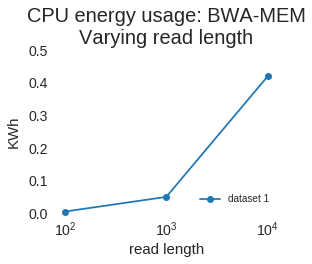

In [16]:
fig = plt.subplots(figsize=(4,3), sharex='col')
grid = gridspec.GridSpec(1,1, hspace=0.5)
ax0 = plt.subplot(grid[0]) 

ax0.set_xlabel("read length", fontsize=15)
ax0.set_ylabel("KWh", fontsize=15)
ax0.yaxis.set_label_coords(-0.15, 0.5)

ax0.set_xscale("log")
ax0.set_ylim(0, .5)

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

linestyle = "solid"
marker = "o"

dataset = "FAB39043"
df = cpu_readlen[cpu_readlen["dataset"]==dataset]
ax0.plot(df["read len"],df["KWh"], c=tableau_colors[0], \
         linestyle=linestyle, marker=marker, \
         label="dataset 1", clip_on=False)

ax0.legend(loc="lower right")

if title:
    ax0.set_title("CPU energy usage: BWA-MEM\nVarying read length", fontsize=20)
ax0.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("../plots/cpu-energy-readlen.png", dpi=600, bbox_inches="tight")

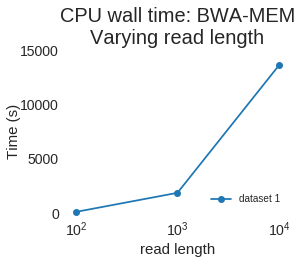

In [17]:
fig = plt.subplots(figsize=(4,3), sharex='col')
grid = gridspec.GridSpec(1,1, hspace=0.5)
ax0 = plt.subplot(grid[0]) 

ax0.set_xlabel("read length", fontsize=15)
ax0.set_ylabel("Time (s)", fontsize=15)
ax0.yaxis.set_label_coords(-0.2, 0.5)

ax0.set_xscale("log")
ax0.set_ylim(0, 15000)

ax0.spines["top"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

linestyle = "solid"
marker = "o"

dataset = "FAB39043"
df = cpu_readlen[cpu_readlen["dataset"]==dataset]
ax0.plot(df["read len"],df["wall time"], c=tableau_colors[0], \
         linestyle=linestyle, marker=marker, \
         label="dataset 1",clip_on=False)

ax0.legend(loc="lower right")

if title:
    ax0.set_title("CPU wall time: BWA-MEM\nVarying read length", fontsize=20)
ax0.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("../plots/cpu-time-readlen.png", dpi=600, bbox_inches="tight")